In [1]:
#importing all the modules which is used in this given dataset
import numpy as np
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
import sklearn
import warnings as w
w.filterwarnings('ignore')

In [2]:
#now loading the dataset by using read_csv() built in functin of pandas library
df=pd.read_csv(r'C:\Users\shaik\Desktop/water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# now doing eda work and cleaning given dataset

In [3]:
#checking how amny records and column present in this given dataset
df.shape

(3276, 10)

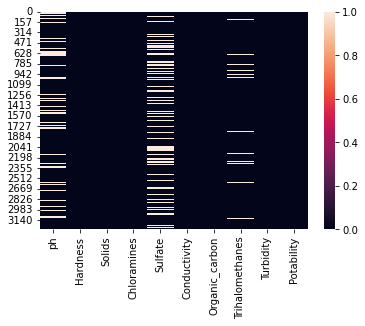

In [4]:
#checking for null value...and visualizing the null value present or not in given dataset
sb.heatmap(df.isnull())
plt.show()
#below result we can conclude that ph of water column,turbidity and trihalomethanes showing null value

In [5]:
#without visualisation we can also identify the null value
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [6]:
#checking the % of null value
df.isnull().sum()/df.shape[0]*100

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

In [7]:
#now filling the null by mean median mode according to the datatype of column
mean=df['ph'].mean()
mean

7.080794504276819

In [8]:
#now filling the ph column with mean permanently
df['ph'].fillna(mean,axis=0,inplace=True)

In [9]:
#now checking the mean of sulphate column
mean2=df['Sulfate'].mean()
mean2

333.7757766108134

In [10]:
#now filling the sulphate column with mean permanently
df['Sulfate'].fillna(mean2,axis=0,inplace=True)

In [11]:
#checking the mean of Trihalomethanes column
mean3=df['Trihalomethanes'].mean()
mean3

66.39629294676803

In [12]:
#now filling the sulphate column with mean permanently
df['Trihalomethanes'].fillna(mean3,axis=0,inplace=True)

In [13]:
#checking the statistical summary of given dataset
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


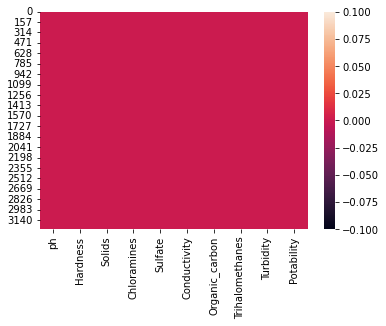

In [14]:
#again visualizing the null value
sb.heatmap(df.isnull())
plt.show()
#pink color indicate no null value present in it

In [15]:
#cross checking the null value by finding
#the dtype of each column and comparing those column record dtype se
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [16]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [17]:
#here in this given dataset potability is the target variable 
#in output variable now we r checking how many unique value present in it
df['Potability'].unique()

#below result we can conclude that output variable are binary class classifier

array([0, 1], dtype=int64)

In [18]:
#now checking that output variable are balanced or not
df['Potability'].value_counts()
#below result we can conclude that output variable is balanced in records 

0    1998
1    1278
Name: Potability, dtype: int64

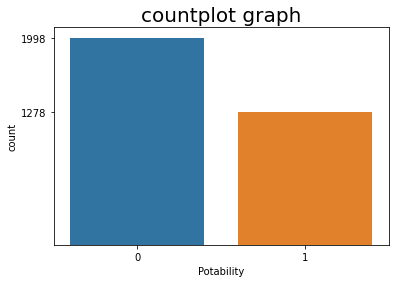

In [19]:
#now visualizing the output variable 
plt.title('countplot graph',fontsize=20)
sb.countplot(data=df,x='Potability')
f=df['Potability'].value_counts()
plt.yticks(f)
plt.show()
#below result we can conclude that output variable is balanced in records 

features: ph,skewness :0.027795881574050114 


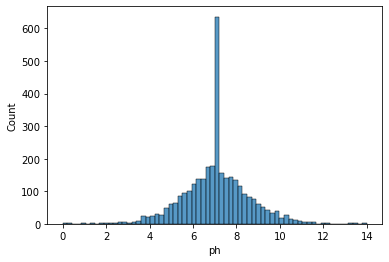

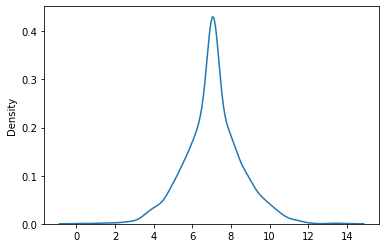

features: Hardness,skewness :-0.0393417047767249 


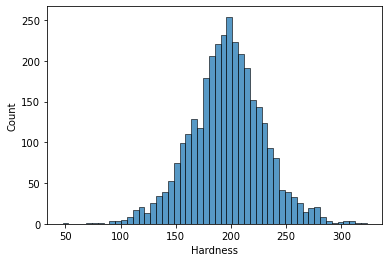

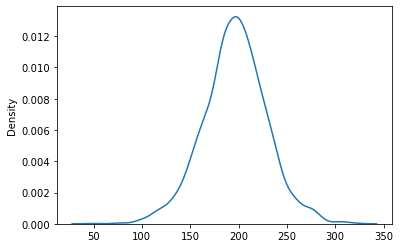

features: Solids,skewness :0.6216344855169127 


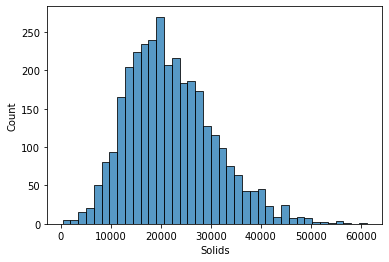

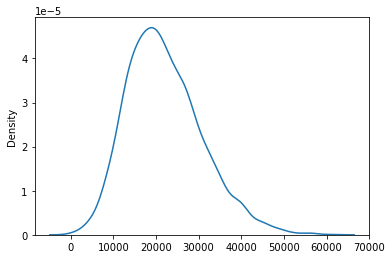

features: Chloramines,skewness :-0.01209844012438221 


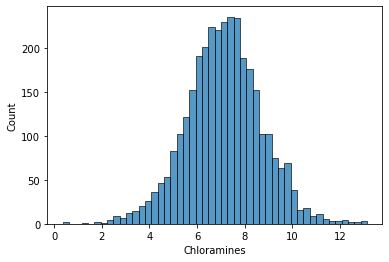

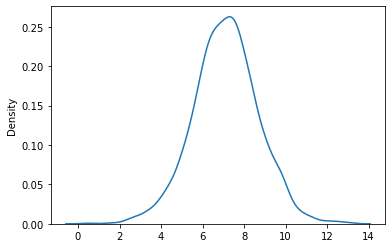

features: Sulfate,skewness :-0.04118437258768767 


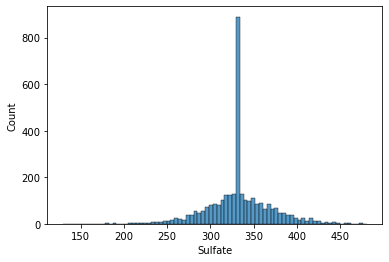

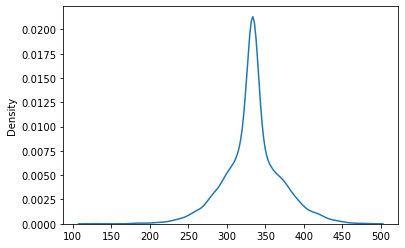

features: Conductivity,skewness :0.2644902239264119 


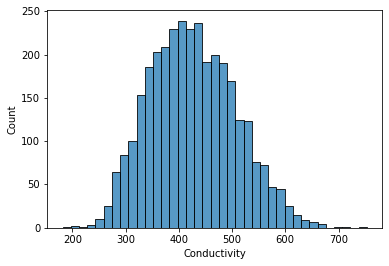

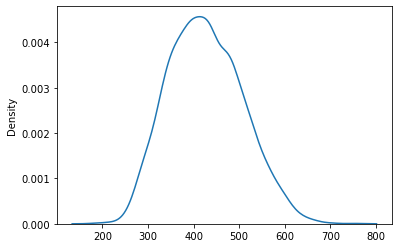

features: Organic_carbon,skewness :0.025532582090242492 


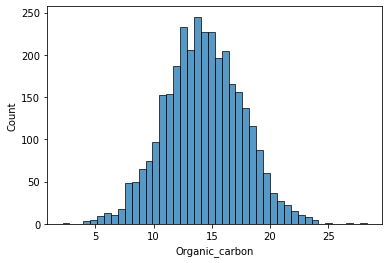

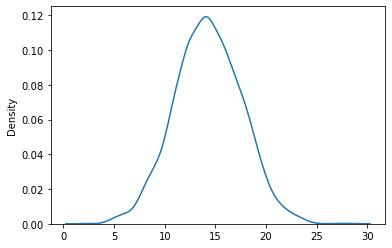

features: Trihalomethanes,skewness :-0.08516101983758483 


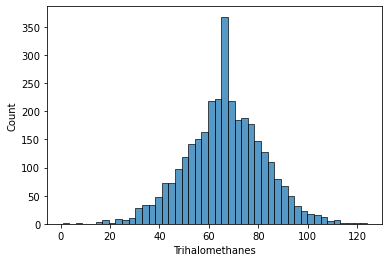

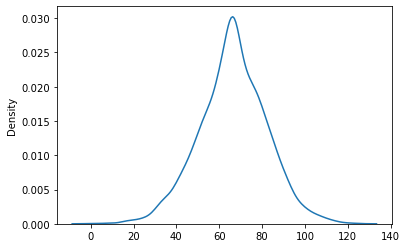

features: Turbidity,skewness :-0.007816642377392604 


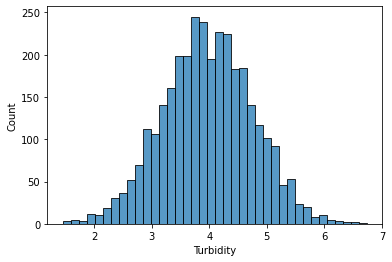

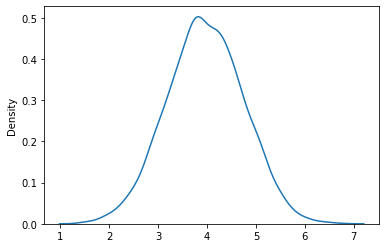

In [20]:
#now checking the skewness of contineous numeric dtype column 
#by using normal distributed curve(is a frequency graph) of seaborn library
df1=df.drop('Potability',axis=1)
x=df1.columns
for i,v in enumerate(x):
    skew=df1[v].skew()
    print(f'features: {v},skewness :{skew} ')
    sb.histplot(data=df1,x=v)
    plt.show()
    sb.distplot(x=df1[v],hist=False)
    plt.show()

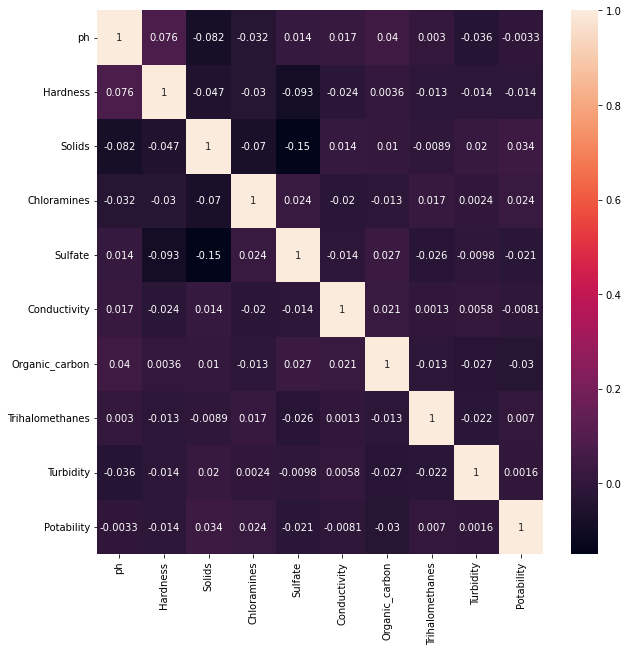

In [21]:
#checking the correlation btn input and output variable and visualizing it
plt.figure(figsize=(10,10))
sb.heatmap(df.corr(),annot=True)
plt.show()

# now giving the dataset to the classification algorithm

In [22]:
#selecting the input and output variable
x=df.drop('Potability',axis=1) #must be in 2d array
y=df['Potability']             #must be in 1d array

In [23]:
#checking the dimension of input and output variable
x.ndim,y.ndim

(2, 1)

In [24]:
#now bifurgating the dataset into 70:30 here 70% data we used for training with classification algo
#30% data we are testing with classification algo
#so calling the constructor class
from sklearn.model_selection import train_test_split


In [25]:
#creating an object of train_test_split class
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

# now doing scaling on input varaiable/independent variable

In [26]:
#so calling the class
from sklearn.preprocessing import StandardScaler
#creating an object of StandardScaler class
ss=StandardScaler()
x_train=ss.fit_transform(x_train) #inside the paranthesis we r 
                                  #passing 2d array and return into 2d numpy array
x_test=ss.transform(x_test)

In [27]:
#now creating a user defined function
def function(model):
    #now training the model
    model.fit(x_train,y_train)
    #now testing the model
    y_predict=model.predict(x_test)
    #now evaluating the model and getting classification report in it
    from sklearn.metrics import classification_report,confusion_matrix
    print(classification_report(y_test,y_predict))
    print(confusion_matrix(y_test,y_predict))
    return model


# now applying first classification algo named as logistic regression

In [28]:
#preparing the model by using logistic regression algo
#calling the class
from sklearn.linear_model import LogisticRegression

#creating an object of LogisticRegression class
lr=LogisticRegression()

In [29]:
#now traing the model and testing the model and getting classification report by calling the function
lr=function(lr)

              precision    recall  f1-score   support

           0       0.60      1.00      0.75       585
           1       0.00      0.00      0.00       398

    accuracy                           0.60       983
   macro avg       0.30      0.50      0.37       983
weighted avg       0.35      0.60      0.44       983

[[585   0]
 [398   0]]


# now doing feature selection by using second classification algo named decision tree classifier 

In [30]:
#preparing the model by using decisiontreeclassifer algo (by default working on gini index method)
from sklearn.tree import DecisionTreeClassifier

In [31]:
#creating an object of DecisionTreeClassifier class
dt=DecisionTreeClassifier(random_state=1)

In [32]:
#now traing the model and testing the model and getting classification report by calling the function
dt=function(dt)

#below result of recall score accuracy showing less bcoz while using dt classifier
#each input variable taking participate in the formation of tree bcoz of that model is overfitted
#to avoid overfitting we have to use pruning technique
#this is also limitation of dt classifier algo

              precision    recall  f1-score   support

           0       0.63      0.64      0.63       585
           1       0.46      0.45      0.45       398

    accuracy                           0.56       983
   macro avg       0.54      0.54      0.54       983
weighted avg       0.56      0.56      0.56       983

[[372 213]
 [219 179]]


In [33]:
#now checking the information gain value return to DecisionTreeClassifier class object
dt.feature_importances_.round(2)
#now checking that which feature ig value showing and converting into df object
dict={'feature':x.columns,'ig_value':dt.feature_importances_.round(2)}
df=pd.DataFrame(dict)
df.sort_values('ig_value',axis=0,ascending=False,ignore_index=False)

,feature,ig_value
1,Hardness,0.15
0,ph,0.12
6,Organic_carbon,0.12
2,Solids,0.11
7,Trihalomethanes,0.11
3,Chloramines,0.10
4,Sulfate,0.10
5,Conductivity,0.10
8,Turbidity,0.10


In [34]:
#now creating a tree
#another limitation of DecisionTreeClassifier is large amount of records present in it take time to 
#to form tree and consume more memory
#calling the class
'''feature=x.columns
plt.figure(figsize=(10,10))
from sklearn.tree import plot_tree
#creating an objects
_=plot_tree(dt,feature_names=feature,filled=True)
plt.show()'''

'feature=x.columns\nplt.figure(figsize=(10,10))\nfrom sklearn.tree import plot_tree\n#creating an objects\n_=plot_tree(dt,feature_names=feature,filled=True)\nplt.show()'

# now applying pruning technique to avoid overfitting model it achieve by using max_depth and min_samples_leaf hyperparameter

In [37]:
#by default working on gini index method
#so its hit and trial method
#finding out what no of depth we r getting recall accuracy better compare to others
'''for i in range(8,0,-1):
    #creating a dt class object
    #by default working on gini index method pe
    dt1=DecisionTreeClassifier(random_state=1,max_depth=i)
    print('no of depth: ',i)
    #calling the function
    dt1=function(dt1)
    dt1
    print()'''
#below result we can conclude that at depth 3 we r getting recall accracy good comparative to others

"for i in range(8,0,-1):\n    #creating a dt class object\n    #by default working on gini index method pe\n    dt1=DecisionTreeClassifier(random_state=1,max_depth=i)\n    print('no of depth: ',i)\n    #calling the function\n    dt1=function(dt1)\n    dt1\n    print()"

In [38]:
#creating a dt class object
#by default working on gini index method pe
dt1=DecisionTreeClassifier(random_state=1,max_depth=3)

In [39]:
#now traing the model and testing the model and getting classification report by calling the function
dt1=function(dt1)

              precision    recall  f1-score   support

           0       0.63      0.93      0.75       585
           1       0.65      0.18      0.29       398

    accuracy                           0.63       983
   macro avg       0.64      0.56      0.52       983
weighted avg       0.64      0.63      0.56       983

[[546  39]
 [325  73]]


In [40]:
#now checking the information gain value return to DecisionTreeClassifier class object
dt.feature_importances_.round(2)
#now checking that which feature ig value showing and converting into df object
dict={'feature':x.columns,'ig_value':dt1.feature_importances_.round(2)}
df=pd.DataFrame(dict)
df.sort_values('ig_value',axis=0,ascending=False,ignore_index=False)

,feature,ig_value
0,ph,0.51
4,Sulfate,0.34
2,Solids,0.09
8,Turbidity,0.06
1,Hardness,0.00
3,Chloramines,0.00
5,Conductivity,0.00
6,Organic_carbon,0.00
7,Trihalomethanes,0.00


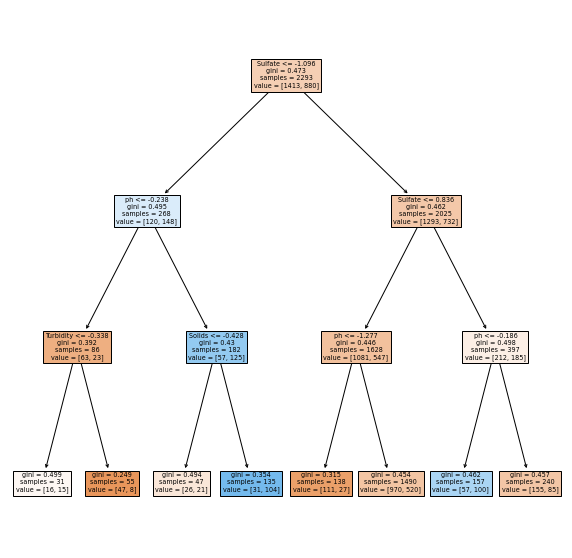

In [41]:
#now creating a tree
#another limitation of DecisionTreeClassifier is large amount of records present in it take time to 
#to form tree and consume more memory
#calling the class
feature=x.columns
plt.figure(figsize=(10,10))
from sklearn.tree import plot_tree
#creating an objects
_=plot_tree(dt1,feature_names=feature,filled=True)
plt.show()

# now applying pruning technique min_samples_leaf to avoid overfitting model

In [43]:
#we r finding out at what no of mn samples leaf we r getting recall accuracy good compare to others
'''for i in range(45,101,1):
    #creating a dt class object
    #by default working on gini index method pe
    dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=i)
    print('at what no of depth: ',i)
    #calling the function
    dt2=function(dt2)
    dt2
    print()'''
#below result we can conclude that at 45 no of min samples leaf we r getting recall accuracy good
#comapre to others

"for i in range(45,101,1):\n    #creating a dt class object\n    #by default working on gini index method pe\n    dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=i)\n    print('at what no of depth: ',i)\n    #calling the function\n    dt2=function(dt2)\n    dt2\n    print()"

In [44]:
#creating a dt class object
#by default working on gini index method pe
dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=45)

In [45]:
#calling the function
dt2=function(dt2)

              precision    recall  f1-score   support

           0       0.63      0.73      0.68       585
           1       0.49      0.38      0.43       398

    accuracy                           0.59       983
   macro avg       0.56      0.55      0.55       983
weighted avg       0.57      0.59      0.58       983

[[426 159]
 [247 151]]


In [46]:
#now checking the information gain value return to DecisionTreeClassifier class object
dt.feature_importances_.round(2)
#now checking that which feature ig value showing and converting into df object
dict={'feature':x.columns,'ig_value':dt2.feature_importances_.round(2)}
df=pd.DataFrame(dict)
df.sort_values('ig_value',axis=0,ascending=False,ignore_index=False)

,feature,ig_value
0,ph,0.30
4,Sulfate,0.21
2,Solids,0.13
1,Hardness,0.11
8,Turbidity,0.10
7,Trihalomethanes,0.05
3,Chloramines,0.04
6,Organic_carbon,0.03
5,Conductivity,0.02


In [47]:
#now creating a tree
#another limitation of DecisionTreeClassifier is large amount of records present in it take time to 
#to form tree and consume more memory
#calling the class
feature=x.columns
plt.figure(figsize=(10,10))
from sklearn.tree import plot_tree
#creating an objects
_=plot_tree(dt2,feature_names=feature,filled=True)
plt.show()

'feature=x.columns\nplt.figure(figsize=(10,10))\nfrom sklearn.tree import plot_tree\n#creating an objects\n_=plot_tree(dt2,feature_names=feature,filled=True)\nplt.show()'

# again doing feature selection by dtclassiiferalgo by using entropy method

In [48]:
#creating an object of DecisionTreeClassifier class
dt=DecisionTreeClassifier(random_state=1,criterion='entropy')
#now training the model and testing the model and getting classification report by calling the functon
dt=function(dt)

              precision    recall  f1-score   support

           0       0.64      0.66      0.65       585
           1       0.48      0.46      0.47       398

    accuracy                           0.58       983
   macro avg       0.56      0.56      0.56       983
weighted avg       0.58      0.58      0.58       983

[[389 196]
 [216 182]]


In [49]:
#if i want to compare the ig value coming out or which feature 
#it achieve by creating a df object
dict={'ig':dt.feature_importances_.round(2),'feature':x.columns}
df1=pd.DataFrame(dict)
df1.sort_values('ig',axis=0,ascending=False,ignore_index=True)

,ig,feature
0,0.16,Hardness
1,0.13,ph
2,0.13,Conductivity
3,0.12,Turbidity
4,0.11,Chloramines
5,0.10,Solids
6,0.09,Organic_carbon
7,0.09,Trihalomethanes
8,0.08,Sulfate


In [50]:
#now checking the information gain value return to DecisionTreeClassifier class object
dt.feature_importances_.round(2)
#now checking that which feature ig value showing and converting into df object
dict={'feature':x.columns,'ig_value':dt.feature_importances_.round(2)}
df=pd.DataFrame(dict)
df.sort_values('ig_value',axis=0,ascending=False,ignore_index=False)

,feature,ig_value
1,Hardness,0.16
0,ph,0.13
5,Conductivity,0.13
8,Turbidity,0.12
3,Chloramines,0.11
2,Solids,0.10
6,Organic_carbon,0.09
7,Trihalomethanes,0.09
4,Sulfate,0.08


In [51]:
#now creating a tree
#another limitation of DecisionTreeClassifier is large amount of records present in it take time to 
#to form tree and consume more memory
#calling the class
feature=x.columns
plt.figure(figsize=(10,10))
from sklearn.tree import plot_tree
#creating an objects
_=plot_tree(dt,feature_names=feature,filled=True)
plt.show()

'feature=x.columns\nplt.figure(figsize=(10,10))\nfrom sklearn.tree import plot_tree\n#creating an objects\n_=plot_tree(dt,feature_names=feature,filled=True)\nplt.show()'

# to avoid overfitting model we r using pruning technique

In [53]:
#so its hit and trial method
#finding out what no of depth we r getting recall accuracy better compare to others
'''for i in range(8,0,-1):
    #creating a dt class object
    #by default working on gini index method pe
    dt1=DecisionTreeClassifier(random_state=1,max_depth=i,criterion='entropy')
    print('no of depth: ',i)
    #calling the function
    dt1=function(dt1)
    dt1
    print()'''
#below result we can conclude that at depth 4 we r getting recall accracy good

"for i in range(8,0,-1):\n    #creating a dt class object\n    #by default working on gini index method pe\n    dt1=DecisionTreeClassifier(random_state=1,max_depth=i,criterion='entropy')\n    print('no of depth: ',i)\n    #calling the function\n    dt1=function(dt1)\n    dt1\n    print()"

In [54]:
#creating a dt class object
#by default working on gini index method pe
dt1=DecisionTreeClassifier(random_state=1,max_depth=4,criterion='entropy')
#calling the function
dt1=function(dt1)

              precision    recall  f1-score   support

           0       0.64      0.90      0.74       585
           1       0.62      0.25      0.36       398

    accuracy                           0.63       983
   macro avg       0.63      0.57      0.55       983
weighted avg       0.63      0.63      0.59       983

[[524  61]
 [298 100]]


In [55]:
#if i want to compare the ig value coming out or which feature 
#it achieve by creating a df object
dict={'ig':dt1.feature_importances_.round(2),'feature':x.columns}
df1=pd.DataFrame(dict)
df1.sort_values('ig',axis=0,ascending=False,ignore_index=True)

,ig,feature
0,0.30,ph
1,0.21,Hardness
2,0.20,Sulfate
3,0.17,Chloramines
4,0.06,Solids
5,0.04,Turbidity
6,0.03,Organic_carbon
7,0.00,Conductivity
8,0.00,Trihalomethanes


In [56]:
#now creating a tree
#another limitation of DecisionTreeClassifier is large amount of records present in it take time to 
#to form tree and consume more memory
#calling the class
feature=x.columns
plt.figure(figsize=(10,10))
from sklearn.tree import plot_tree
#creating an objects
_=plot_tree(dt1,feature_names=feature,filled=True)
plt.show()

'feature=x.columns\nplt.figure(figsize=(10,10))\nfrom sklearn.tree import plot_tree\n#creating an objects\n_=plot_tree(dt1,feature_names=feature,filled=True)\nplt.show()'

# now applying pruning technique min_samples_leaf to avoid overfitting model

In [58]:
#we r finding out at what no of mn samples leaf we r getting recall accuracy good compare to others
'''for i in range(45,101,1):
    #creating a dt class object
    #by default working on gini index method pe
    dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=i,criterion='entropy')
    print('at what no of depth: ',i)
    #calling the function
    dt2=function(dt2)
    dt2
    print()'''
#below result we can conclude that at 45 no of min samples leaf we r getting recall accuracy good
#comapre to others

"for i in range(45,101,1):\n    #creating a dt class object\n    #by default working on gini index method pe\n    dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=i,criterion='entropy')\n    print('at what no of depth: ',i)\n    #calling the function\n    dt2=function(dt2)\n    dt2\n    print()"

In [59]:
#creating a dt class object
#by default working on gini index method pe
dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=45,criterion='entropy')
#calling the function
dt2=function(dt2)

              precision    recall  f1-score   support

           0       0.65      0.82      0.73       585
           1       0.57      0.35      0.43       398

    accuracy                           0.63       983
   macro avg       0.61      0.59      0.58       983
weighted avg       0.62      0.63      0.61       983

[[482 103]
 [260 138]]


In [60]:
#if i want to compare the ig value coming out or which feature 
#it achieve by creating a df object
dict={'ig':dt2.feature_importances_.round(2),'feature':x.columns}
df1=pd.DataFrame(dict)
df1.sort_values('ig',axis=0,ascending=False,ignore_index=True)

,ig,feature
0,0.39,ph
1,0.19,Sulfate
2,0.16,Hardness
3,0.08,Solids
4,0.06,Chloramines
5,0.06,Trihalomethanes
6,0.04,Conductivity
7,0.01,Organic_carbon
8,0.01,Turbidity


In [61]:
#now creating a tree
#another limitation of DecisionTreeClassifier is large amount of records present in it take time to 
#to form tree and consume more memory
#calling the class
feature=x.columns
plt.figure(figsize=(10,10))
from sklearn.tree import plot_tree
#creating an objects
_=plot_tree(dt2,feature_names=feature,filled=True)
plt.show()

'feature=x.columns\nplt.figure(figsize=(10,10))\nfrom sklearn.tree import plot_tree\n#creating an objects\n_=plot_tree(dt2,feature_names=feature,filled=True)\nplt.show()'

conclusion:- decision tree classifier algo along with entropy method is suitable for this given dataset

# now applying 3rd classification named as randomforesttreeclassifier algo using gini index

In [62]:
#preparing the model by using randomforestclassifer algo
from sklearn.ensemble import RandomForestClassifier

In [63]:
#in rfc algo we r finding out what no of features we r getting recall accuracy good
#we r finding randomly selected feature ka ig value by using entropy method
#n_estimators means 70% training data reqd how many no of dt to get recall accuracy good

In [64]:
x.shape

(3276, 9)

In [66]:
#so its hit and trial method
'''for i in range (9,0,-1):
    #creating an object of rfc class
    rfc=RandomForestClassifier(n_estimators=10,max_features=i,random_state=1)
    print('at what min no of features',i)
    #calling the function
    rfc=function(rfc)
    rfc
    print()'''
#below result we can conclude that at 2 no of features of dt we r getting recall accuracy good
#comparatives to others

"for i in range (9,0,-1):\n    #creating an object of rfc class\n    rfc=RandomForestClassifier(n_estimators=10,max_features=i,random_state=1)\n    print('at what min no of features',i)\n    #calling the function\n    rfc=function(rfc)\n    rfc\n    print()"

In [67]:
#creating an object of rfc class
rfc=RandomForestClassifier(n_estimators=10,max_features=2,random_state=1)
#calling the function
rfc=function(rfc)

              precision    recall  f1-score   support

           0       0.64      0.85      0.73       585
           1       0.58      0.30      0.40       398

    accuracy                           0.63       983
   macro avg       0.61      0.58      0.57       983
weighted avg       0.62      0.63      0.60       983

[[499  86]
 [278 120]]


# now applying randomforestclassifer algo using entropy method

In [69]:
#so its hit and trial method
'''for i in range (9,0,-1):
    #creating an object of rfc class
    rfc=RandomForestClassifier(n_estimators=10,max_features=i,criterion='entropy',random_state=1)
    print('at what min no of features',i)
    #calling the function
    rfc=function(rfc)
    rfc
    print()'''
#below result we can conclude that at 4 no of features of dt we r getting recall accuracy good
#comparatives to others

"for i in range (9,0,-1):\n    #creating an object of rfc class\n    rfc=RandomForestClassifier(n_estimators=10,max_features=i,criterion='entropy',random_state=1)\n    print('at what min no of features',i)\n    #calling the function\n    rfc=function(rfc)\n    rfc\n    print()"

In [70]:
#creating an object of rfc class
rfc=RandomForestClassifier(n_estimators=10,max_features=4,criterion='entropy',random_state=1)
#calling the function
rfc=function(rfc)

              precision    recall  f1-score   support

           0       0.65      0.85      0.74       585
           1       0.59      0.31      0.41       398

    accuracy                           0.63       983
   macro avg       0.62      0.58      0.57       983
weighted avg       0.62      0.63      0.60       983

[[499  86]
 [273 125]]


conclusion:- for this given dataset random forest tree classifier algo with entropy method is suitable

# next classification algo that we r refering named as ada boost means adaptor boosting classifer algo

In [72]:
#it create a decision stump (means 1 root node and 2 leaf node...according to the ig value
#by coming out from entropy or gini index...and creating stump of its it referd as weak learner)
#lly this weak learner process will repeat to others features also ....
#when all the weak learner together refered as strong learner
#at we r finding at what no of decisionstump(features)
#we r getting accuracy of model good compare to others
#preparing the model by using ada boost classifier algo
#so calling the class
from sklearn.ensemble import AdaBoostClassifier
#so its hit and trial method
'''for i in range(9,0,-1):
    #creating an object of AdaBoostClassifier class
    ada=AdaBoostClassifier(n_estimators=i,random_state=1)
    print('at what no of decision stump',i)
    #calling the function
    ada=function(ada)
    ada
    print()'''
#below result we can conclude at 5 no of feature or decision stump
#we r getting recal accuracy good compare to others

"for i in range(9,0,-1):\n    #creating an object of AdaBoostClassifier class\n    ada=AdaBoostClassifier(n_estimators=i,random_state=1)\n    print('at what no of decision stump',i)\n    #calling the function\n    ada=function(ada)\n    ada\n    print()"

In [73]:
#creating an object of AdaBoostClassifier class
ada=AdaBoostClassifier(n_estimators=5,random_state=1)
#calling the function
ada=function(ada)

              precision    recall  f1-score   support

           0       0.61      0.88      0.72       585
           1       0.50      0.18      0.26       398

    accuracy                           0.60       983
   macro avg       0.56      0.53      0.49       983
weighted avg       0.57      0.60      0.53       983

[[515  70]
 [328  70]]


# next classification algo that we r refering named as gradientboostingclassifier algo part of ensembling technique

In [74]:
#it create full grown tree 
#(decisiontree according to the ig value which is coming out either by entropyor gini index)
#and focusing short coming errors (means residual or misclassiifed error on 2nd iteration of dt)
#min dt>=10 and dt max<=100
#so its a hit and trial method
#and we r finding out at what no of dt we r getting accuracy of model good comare to others

In [76]:
#preparing the model by using gradientbosstingclassifer algo 
#calling the class
from sklearn.ensemble import GradientBoostingClassifier
#so hit and trial method
'''for i in range(10,101,1):
    #creating an object of gbc class
    gbc=GradientBoostingClassifier(n_estimators=i,random_state=1)
    print('no of dt',i)
    #calling the function
    gbc=function(gbc)
    gbc
    print()'''
#below result we can conclude that at 10 no of dt we r getting recall accuracy compare to others

"for i in range(10,101,1):\n    #creating an object of gbc class\n    gbc=GradientBoostingClassifier(n_estimators=i,random_state=1)\n    print('no of dt',i)\n    #calling the function\n    gbc=function(gbc)\n    gbc\n    print()"

In [77]:
#creating an object of gbc class
gbc=GradientBoostingClassifier(n_estimators=10,random_state=1)
#calling the function
gbc=function(gbc)
gbc

              precision    recall  f1-score   support

           0       0.62      0.95      0.75       585
           1       0.66      0.14      0.24       398

    accuracy                           0.62       983
   macro avg       0.64      0.55      0.49       983
weighted avg       0.63      0.62      0.54       983

[[555  30]
 [341  57]]


GradientBoostingClassifier(n_estimators=10, random_state=1)

# next classification algo that we r refering named as extremegradientboosting algo

In [79]:
#preparing the model by using extremegradientboosting algo
#so calling the class
from xgboost import XGBClassifier
#so hit and trial method
'''for i in range(10,101,1):
    #creating an object of gbc class
    xgb=XGBClassifier(n_estimators=i,reg_alpha=1,random_state=1)
    #reg_alpha means it prevent from overfitting the model
    print('no of dt',i)
    #calling the function
    xgb=function(xgb)
    xgb
    print()'''
#below result we can conclude that at 19 no of dt we r getting recall accuracy good compare to others

"for i in range(10,101,1):\n    #creating an object of gbc class\n    xgb=XGBClassifier(n_estimators=i,reg_alpha=1,random_state=1)\n    #reg_alpha means it prevent from overfitting the model\n    print('no of dt',i)\n    #calling the function\n    xgb=function(xgb)\n    xgb\n    print()"

In [80]:
#creating an object of gbc class
xgb=XGBClassifier(n_estimators=19,reg_alpha=1,random_state=1)
#calling the function
xgb=function(xgb)
xgb

              precision    recall  f1-score   support

           0       0.65      0.85      0.73       585
           1       0.59      0.33      0.42       398

    accuracy                           0.64       983
   macro avg       0.62      0.59      0.58       983
weighted avg       0.63      0.64      0.61       983

[[495  90]
 [267 131]]


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=19, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=1, reg_lambda=1, ...)

conclusion:- in ensembling technique the best algo for this given
datset is extremegradientboosting algorithm

# next classification algo we refering named as svm algo

In [ ]:
#support vector machine depend upon quality of data are 2 type
#1. linear seperatable data
#(if outlier present at training time we add some external error to avoid overfitting 
#model c=0.001 to 1 range lie) if accuracy of model didnt change after adding error
#it means the data quality is non-linear seperatable data
#2.non linear seperatable data (we use kernel function polynomial or radiabasis)


In [81]:
#preparing the model by using svm algo
from sklearn.svm import LinearSVC
#creating an object of LinearSVC class
svc1=LinearSVC(random_state=1)
#calling the function
svc1=function(svc1)
svc1

              precision    recall  f1-score   support

           0       0.60      1.00      0.75       585
           1       0.00      0.00      0.00       398

    accuracy                           0.60       983
   macro avg       0.30      0.50      0.37       983
weighted avg       0.35      0.60      0.44       983

[[585   0]
 [398   0]]


LinearSVC(random_state=1)

In [ ]:
#now adding some external error btn c=0.001 to 1...
#at training time and checking accuracy change or not
#if not change means ....data is non linear seperatable
#if change than it means data is linear seperatable

In [82]:
#creating an object of LinearSVC class
svc1=LinearSVC(random_state=1,C=0.90)
#calling the function
svc1=function(svc1)
svc1
#below result we can conclude that the data is non linear seperatable

              precision    recall  f1-score   support

           0       0.60      1.00      0.75       585
           1       0.00      0.00      0.00       398

    accuracy                           0.60       983
   macro avg       0.30      0.50      0.37       983
weighted avg       0.35      0.60      0.44       983

[[585   0]
 [398   0]]


LinearSVC(C=0.9, random_state=1)

In [83]:
#preparing the model by using svm algo (by using non-linear seperatable data)
#it achieve by using kernel function
#in polynomial kernel function we increase the dimension of graph from 1d to 2d
#so calling the class
from sklearn.svm import SVC
#creating an object of svc class
svc2=SVC(random_state=1,kernel='poly')
#calling the function
svc2=function(svc2)
svc2

              precision    recall  f1-score   support

           0       0.61      0.99      0.75       585
           1       0.78      0.06      0.12       398

    accuracy                           0.61       983
   macro avg       0.69      0.53      0.43       983
weighted avg       0.68      0.61      0.49       983

[[578   7]
 [373  25]]


SVC(kernel='poly', random_state=1)

In [84]:
#creating an object of svc class
svc3=SVC(random_state=1,kernel='rbf')
#calling the function
svc3=function(svc3)
svc3

              precision    recall  f1-score   support

           0       0.66      0.92      0.77       585
           1       0.72      0.29      0.42       398

    accuracy                           0.67       983
   macro avg       0.69      0.61      0.59       983
weighted avg       0.68      0.67      0.62       983

[[540  45]
 [282 116]]


SVC(random_state=1)

conclusion:- for this given dataset radial kernel function of nonlinear seperatable data of svm is suitable

# next classification algo that we r refering named as KNN k nearest neighbors algo

In [87]:
#preparing the model by using knn algo
#so calling the class
from sklearn.neighbors import KNeighborsClassifier
#creating an object of KNeighborsClassifier class
knn=KNeighborsClassifier(n_neighbors=5,p=2)
#calling the function
knn=function(knn)
knn

              precision    recall  f1-score   support

           0       0.66      0.76      0.70       585
           1       0.54      0.42      0.47       398

    accuracy                           0.62       983
   macro avg       0.60      0.59      0.59       983
weighted avg       0.61      0.62      0.61       983

[[442 143]
 [230 168]]


KNeighborsClassifier()

conclusion:- for this given datset knn algo is also best 

# next classification algo that we r refering named gaussiannaive_bayes algo

In [88]:
#working on small data not suitable of large amount of data
#working on mechanism of condition probabaility
#p(a/b)=means finding prob of a in given prob of b==>p(b/a)*p(a)/p(b)
#if in given dataset any object/categorical/discrete  dataype column value present 
#so we cannot use gaussian naiv_bayes algo in it
#like this dataset

In [89]:
#preparing the model by calling the gaussian naive bayes algo
from sklearn.naive_bayes import GaussianNB
#creating an object of GaussianNB
gnb=GaussianNB()
#calling the function
gnb=function(gnb)

              precision    recall  f1-score   support

           0       0.63      0.88      0.73       585
           1       0.57      0.24      0.33       398

    accuracy                           0.62       983
   macro avg       0.60      0.56      0.53       983
weighted avg       0.61      0.62      0.57       983

[[515  70]
 [304  94]]


conclusion:- gaussiannb algo is also suitable for this given dataset